**Predicting Diabetes with Data-Driven Machine Learning Approaches**

In [ ]:
import numpy as np
import pandas as pd
#import filter warning librar
import warnings
warnings.filterwarnings("ignore")
#customize descriptive stats
from collections import OrderedDict
#import data visulization library
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

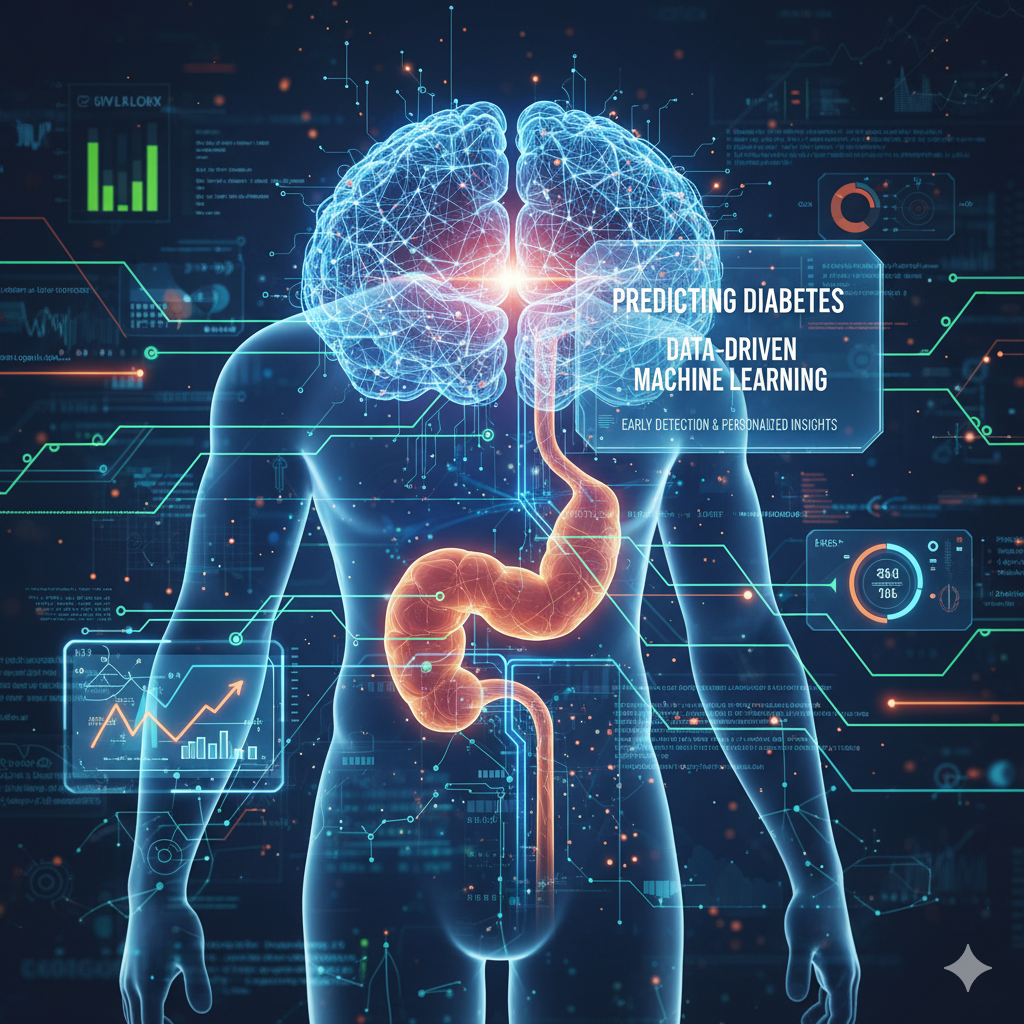

In [ ]:
# loading the diabetes dataset to a pandas DataFrame
df= pd.read_csv('/content/diabetes.csv')

In [ ]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
426,0,94,0,0,0,0.0,0.256,25,0
323,13,152,90,33,29,26.8,0.731,43,1
342,1,0,68,35,0,32.0,0.389,22,0
317,3,182,74,0,0,30.5,0.345,29,1
408,8,197,74,0,0,25.9,1.191,39,1


In [ ]:
df.shape

(768, 9)

In [ ]:
#checking missing value
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
#stastistic
numeric_cols = df.select_dtypes(include=['number']).columns

stats = []
for i in numeric_cols:
    numerical_stats = OrderedDict({
        "Feature": i,
        "max": df[i].max(),
        "min": df[i].min(),
        "mean": df[i].mean(),
        "median": df[i].median(),
        "standard deviation": df[i].std(),
        "variance": df[i].var(),
        "skewness": df[i].skew(),
        "kurtosis": df[i].kurt(),
        "25%": df[i].quantile(0.25),
        "75%": df[i].quantile(0.75),
        "IQR": df[i].quantile(0.75) - df[i].quantile(0.25)
    })
    stats.append(numerical_stats)

# Create DataFrame report
report = pd.DataFrame(stats)
print(report.T)

                              0            1              2              3  \
Feature             Pregnancies      Glucose  BloodPressure  SkinThickness   
max                        17.0        199.0          122.0           99.0   
min                         0.0          0.0            0.0            0.0   
mean                   3.845052   120.894531      69.105469      20.536458   
median                      3.0        117.0           72.0           23.0   
standard deviation     3.369578    31.972618      19.355807      15.952218   
variance              11.354056  1022.248314     374.647271     254.473245   
skewness               0.901674     0.173754      -1.843608       0.109372   
kurtosis                0.15922      0.64078       5.180157      -0.520072   
25%                         1.0         99.0           62.0            0.0   
75%                         6.0       140.25           80.0           32.0   
IQR                         5.0        41.25           18.0     

In [ ]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df['Outcome'].value_counts()
#0 --> non diab
#1 ---. diab

,count
Outcome,
0,500
1,268


In [ ]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
 #separating the data and labels
X = df.drop(columns = 'Outcome', axis=1)
Y = df['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


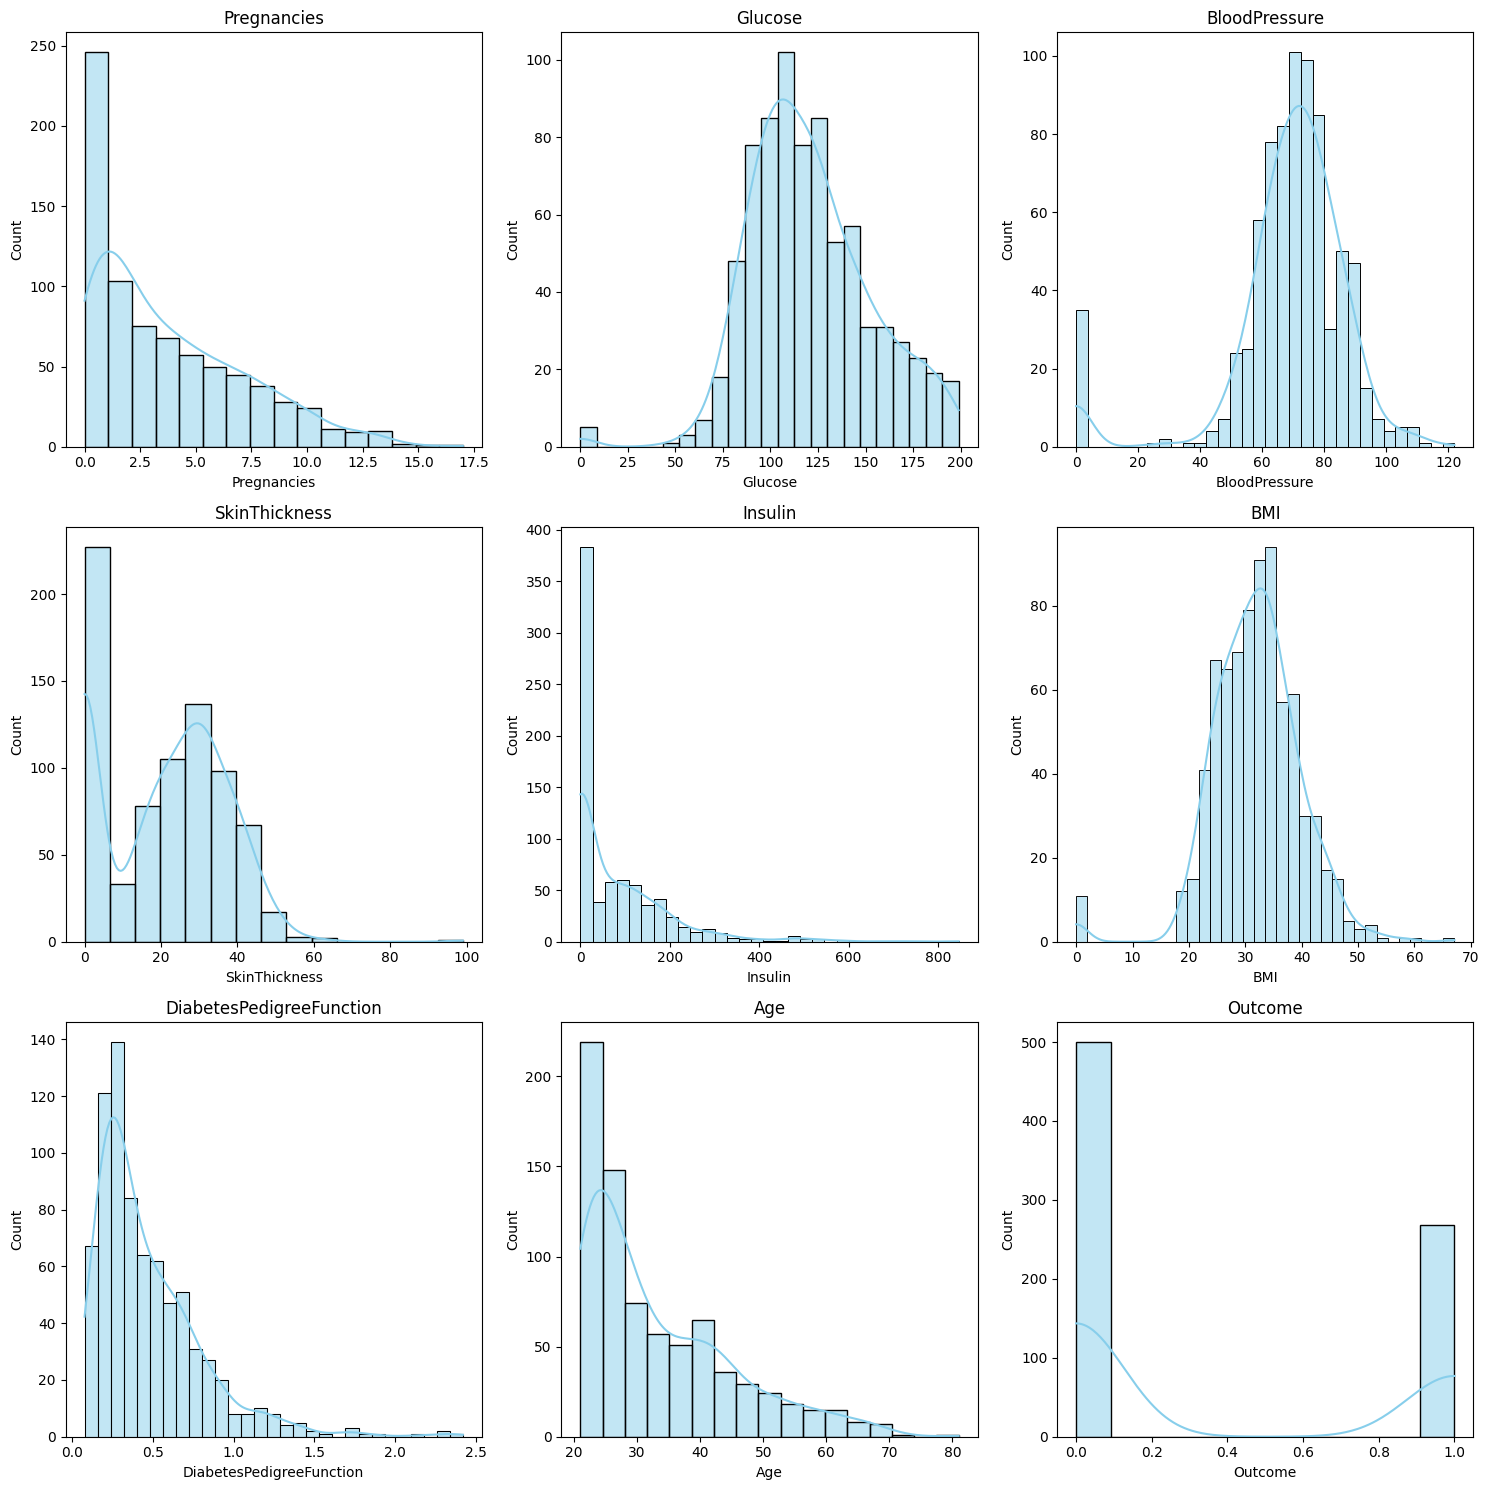

In [48]:
numeric_cols = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 15))  # Bigger figure
plot = 0

for col in numeric_cols:
    plot += 1
    plt.subplot(3, 3, plot)  # adjust rows/cols if you have many columns
    sns.histplot(df[col], kde=True, color='skyblue')  # kde=True adds density curve
    plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
# Train  test and split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [ ]:
#Training the model
classifier = svm.SVC(kernel='linear')
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)


SVC(kernel='linear')

In [ ]:
#model evaluation  accuracy score

In [ ]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7833876221498371


In [ ]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


In [ ]:
#saving the train model

In [ ]:
import pickle

In [ ]:
filename="trained_model.sav"
pickle.dump(classifier,open(filename,'wb'))

In [ ]:
#loading the save model

In [ ]:
loaded_model = pickle.load(open('trained_model.sav','rb'))

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')